In [2]:
import pandas as pd
import numpy as np
import scipy as sc
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('student-por.csv',header=0,usecols=['Dalc','Walc','G1','G2','G3'])
df.head(7)


,Dalc,Walc,G1,G2,G3
0,1,1,0,11,11
1,1,1,9,11,11
2,2,3,12,13,12
3,1,1,14,14,14
4,1,2,11,13,13
5,1,2,12,12,13
6,1,1,13,12,13


In [8]:
matrix=df.iloc[:,:].values
# make avarage alcohol consumption based on work and weekand days
x = matrix[:,0]*5/7 + matrix[:,1]*2/7 
# make avarage grades based on three grades
y = (matrix[:,2] + matrix[:,3] + matrix[:,4])/3 
x.shape 

(649,)

In [9]:
mx = x.mean()
my = y.mean()
c1 = np.sum((x-mx)*(y-my))/np.sum((x-mx)**2)
c0 = my - c1*mx

Text(0.5,1,'Simple linear regression\n')

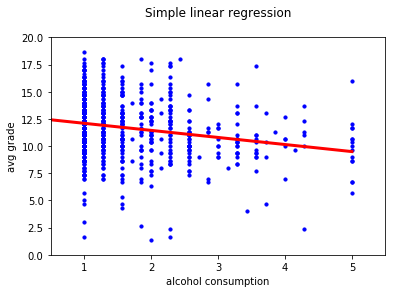

In [52]:
x2=[0,5]

y2=[c0 + c1*0,c0 + c1*5]
plt.scatter(x,y,c='b',s=10)
plt.plot(x2,y2,c='r',linewidth=3)
plt.xlabel('alcohol consumption')
plt.axis([0.5,5.5,0,20])
plt.ylabel('avg grade')
plt.title('Simple linear regression\n')


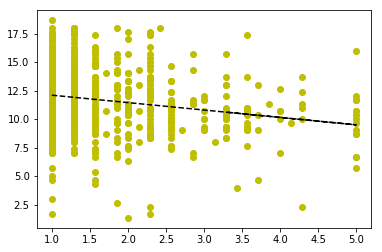

In [40]:
fit = np.polyfit(x,y,1)
fit_fn = np.poly1d(fit) 
# fit_fn is now a function which takes in x and returns an estimate for y

plt.plot(x,y, 'yo', x, fit_fn(x), '--k')

plt.show()

In [ ]:
def predict(x):
    return c0 + c1*x